In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train_cleaned.csv')
test_df = pd.read_csv('data/test_cleaned.csv')

In [3]:
# lets split the target data from the train data

y = train_df['is_promoted']
x = train_df.drop(['is_promoted'], axis = 1)
x_test = test_df

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54808, 12)
Shape of the y : (54808,)
Shape of the x Test : (23490, 12)


## Resampling

In [4]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [5]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
1    50140
0    50140
Name: 0, dtype: int64


In [6]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_test1, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 41)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x test1 :", x_test1.shape)
print("Shape of the y test1 :", y_test.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x test1 : (20056, 12)
Shape of the y test1 : (20056, 1)
Shape of the x Test : (23490, 12)


## Scalling

In [7]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test1)
x_test = sc.transform(x_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.898932987634623
Testing Accuracy : 0.8862185879537295


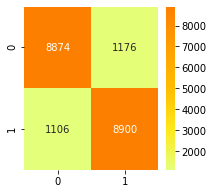

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(x_train,y_train)


y_pred = model.predict(x_test1)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test1, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

## Hyper PArameter Optimisation

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [19]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [20]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [21]:
classifier=xgboost.XGBClassifier()

In [22]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [29]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished



 Time taken: 0 hours 1 minutes and 11.15 seconds.


In [30]:
random_search.best_score_

0.9656791488400106

In [31]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)